In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [4]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [5]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [6]:
df.isna().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [7]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [11]:
df.shape

(52, 6)

In [13]:
df = df.drop_duplicates()

In [14]:
df.shape

(52, 6)

In [8]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


<AxesSubplot:xlabel='Sex'>

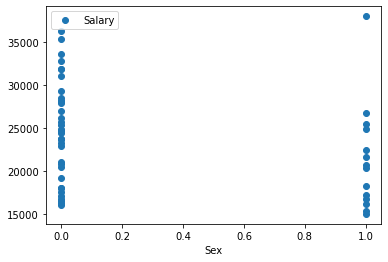

In [4]:
df.plot(x = 'Sex', y = 'Salary',style = 'o')

In [13]:
X = df.loc[:,['Sex','Rank','Year','Degree','YSdeg']].values
y = df.loc[:,'Salary'].values

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 7)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
lr.coef_

array([ 2075.13040581,  6160.15569437,   507.79715899, -1553.61795249,
        -173.33053694])

In [17]:
lr.intercept_

10658.897264510058

In [18]:
y_pred = lr.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([28887.02952781, 29426.57400482, 23074.53644172, 28540.36845393,
       25457.22218901, 21555.98100223, 18962.5998726 , 21372.19690045,
       29866.04049028, 30373.83764927, 16107.69878742, 22869.45858675,
       16429.97095763, 26138.34988493, 15599.90162843, 18976.31516693])

In [20]:
from sklearn import metrics
y_pred = lr.predict(X_test) 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7801347152885467


In [ ]:
# Sex is not important factor in salary predictions.